# Chapter 2 - Statistics Background for Forecasting

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

**2.1 - Consider the US Treasury Securities rate data in Table B.1. Find the sample autocorrelation function and the variogram for these data. Is the time series stationary or nonstationary?**

In [3]:
usts = pd.read_csv('data/Sorted_Treasury_Rates.csv')

usts

,Month,Rate (%)
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95
...,...,...
641,2006-10-01,4.73
642,2006-11-01,4.60
643,2006-12-01,4.56
644,2007-01-01,4.76


In [4]:
usts['Date'] = pd.to_datetime(usts['Month'])   # Ensure it's in datetime format
usts = usts.set_index('Date')                  # Set as index
usts = usts.sort_index()                       # Sort the index chronologically
usts.head()

,Month,Rate (%)
Date,,
1953-04-01,1953-04-01,2.83
1953-05-01,1953-05-01,3.05
1953-06-01,1953-06-01,3.11
1953-07-01,1953-07-01,2.93
1953-08-01,1953-08-01,2.95


In [5]:
usts.drop(columns='Month', inplace=True)                 # Drop 'Month' column if still present
usts.head()

,Rate (%)
Date,
1953-04-01,2.83
1953-05-01,3.05
1953-06-01,3.11
1953-07-01,2.93
1953-08-01,2.95


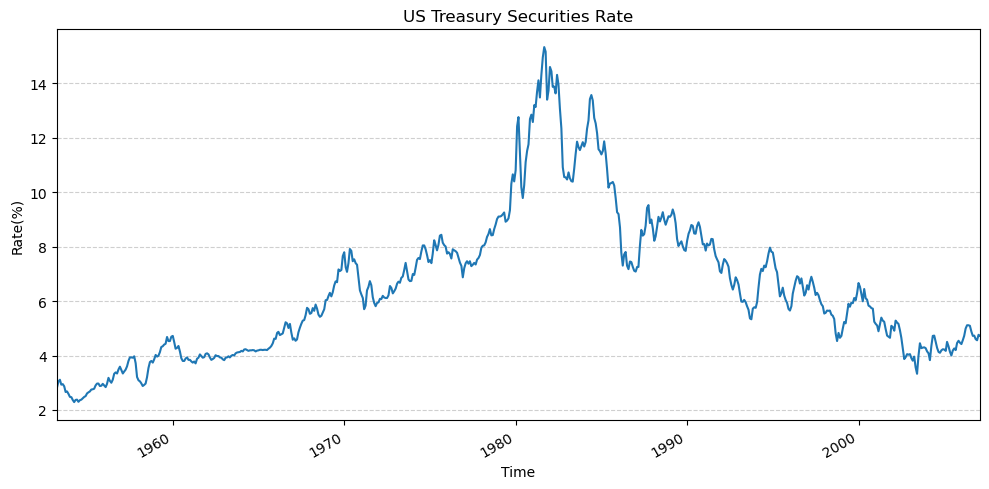

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(usts)
ax.set_xlabel('Time')
ax.set_ylabel('Rate(%)')
ax.set_title('US Treasury Securities Rate')
ax.set_xlim(pd.to_datetime('1953-04-01'), pd.to_datetime('2007-02-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

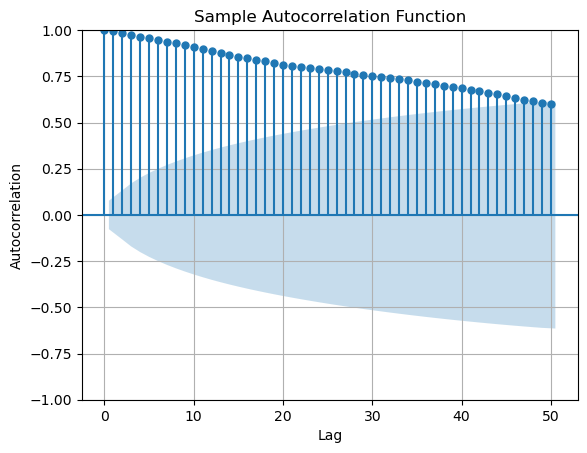

In [7]:
plot_acf(usts, lags=50)
plt.title('Sample Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### Variogram Definition

The **variogram** (semi-variance) measures how dissimilar values are as a function of lag $h$. It is defined as:

$$
\gamma(h) = \frac{1}{2(N - h)} \sum_{t=1}^{N - h} \left( x_t - x_{t+h} \right)^2
$$

Where:
- $ \gamma(h) $: semi-variance at lag $h$
- $ N $: total number of observations
- $ x_t $: value at time $t$
- $ h $: lag

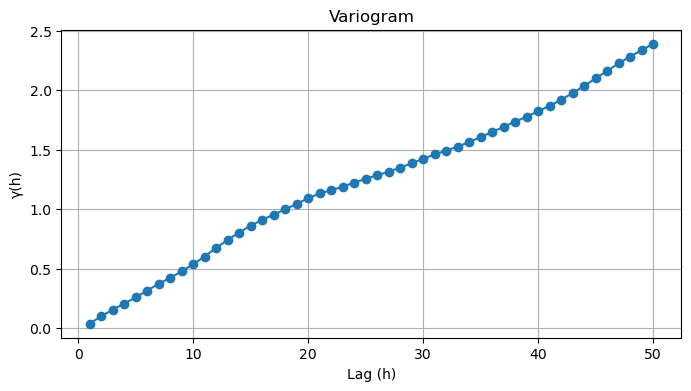

In [8]:
def compute_variogram(series, max_lag=50):
    
    values = series.values.astype(float)                # Convert the input Series to a NumPy array of floats
    variogram = []                                      # This will store γ(h) values for each lag h
    
    for h in range(1, max_lag + 1):                     # Loop over lags from 1 to max_lag
        diffs = values[:-h] - values[h:]                # Compute (x_t - x_{t+h}) for all t = 1 to N - h
        gamma_h = 0.5 * np.mean(diffs**2)               # γ(h) = (1/2) * mean of squared differences
        variogram.append(gamma_h)                       # Store the computed γ(h)
        
    return variogram                                    # Return the full list of γ(h)

# Recalculate with cleaned data
variogram_values = compute_variogram(usts['Rate (%)'], max_lag=50)

# Plot the variogram
plt.figure(figsize=(8, 4))
plt.plot(range(1, 51), variogram_values, marker='o')
plt.title('Variogram')
plt.xlabel('Lag (h)')
plt.ylabel('γ(h)')
plt.grid(True)
plt.show()

In [9]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(usts)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -1.6177045702511161
p-value: 0.47393290722822246

p-value > alpha; H0: Not Stationary


**2.2 Consider the data on US production of blue and gorgonzola cheeses
in Table B.4.**

In [10]:
# Create the organized data
data = {
    "Year": [
        1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
        1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997
    ],
    "Production": [
        7657, 5451, 10883, 9554, 9519, 10047, 10663, 10864, 11447, 12710,
        15169, 16205, 14507, 15400, 16800, 19000, 20198, 18573, 19375, 21032,
        23250, 25219, 28549, 29759, 28262, 28506, 33885, 34776, 35347, 34628,
        33043, 30214, 31013, 31496, 34115, 33433, 34198, 35863, 37789, 34561,
        36434, 34371, 33307, 33295, 36514, 36593, 38311, 42773
    ]
}
# Create the DataFrame
df_production = pd.DataFrame(data).set_index('Year')

# Display the DataFrame
df_production.head()

,Production
Year,
1950,7657
1951,5451
1952,10883
1953,9554
1954,9519


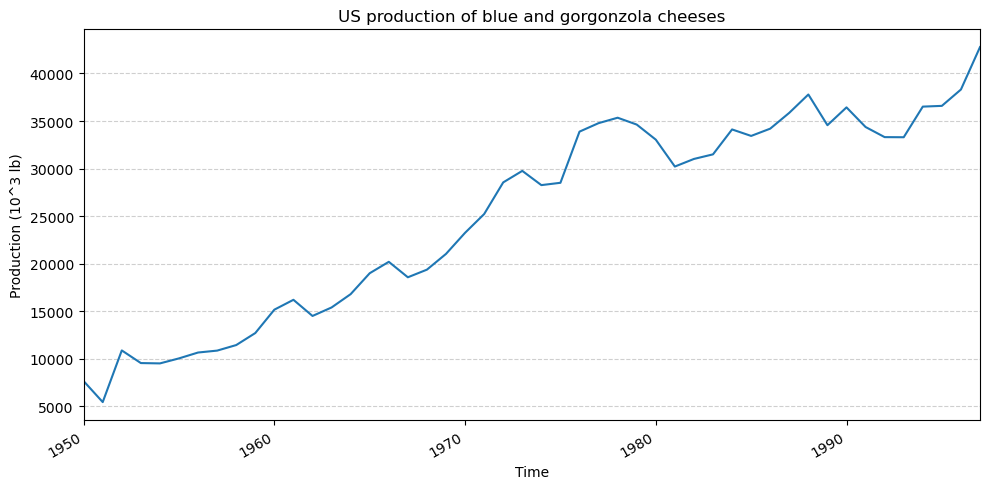

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_production)
ax.set_xlabel('Time')
ax.set_ylabel('Production (10^3 lb)')
ax.set_title('US production of blue and gorgonzola cheeses')
ax.set_xlim(1950,1997)
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

**a. Find the sample autocorrelation function and the variogram for
these data. Is the time series stationary or nonstationary?**

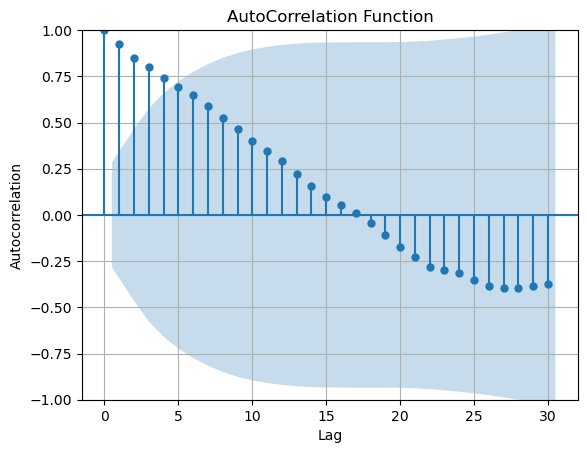

In [12]:
plot_acf(df_production['Production'], lags=30)
plt.title('AutoCorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

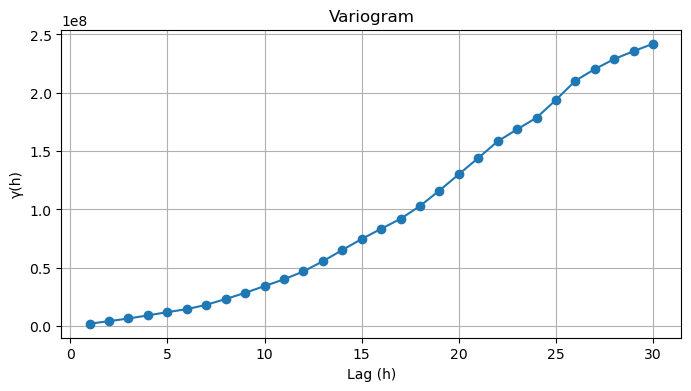

In [13]:
# Recalculate with cleaned data
variogram_values = compute_variogram(df_production['Production'], max_lag=30)

# Plot the variogram
plt.figure(figsize=(8, 4))
plt.plot(range(1, 31), variogram_values, marker='o')
plt.title('Variogram')
plt.xlabel('Lag (h)')
plt.ylabel('γ(h)')
#plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show();

In [14]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df_production['Production'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -0.5939049291802343
p-value: 0.8723533238934722

p-value > alpha; H0: Not Stationary


**b. Take the first difference of the time series, then find the sample
autocorrelation function and the variogram. What conclusions
can you draw about the structure and behavior of the time series?**

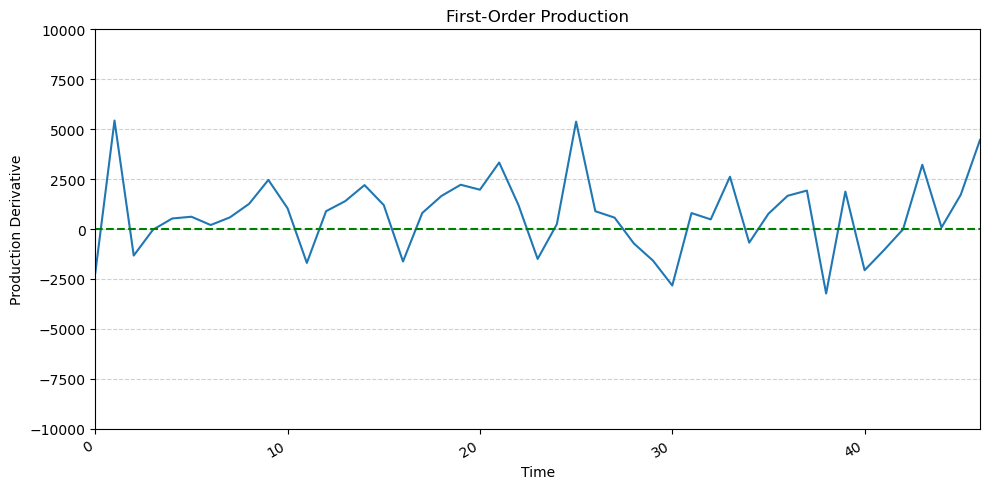

In [15]:
# First-order differencing
production_diff = np.diff(df_production['Production'], n=1)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(production_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Production Derivative')
ax.set_title('First-Order Production')
ax.set_xlim(0,46)
ax.set_ylim(-10000,+10000)
ax.grid(axis='y', linestyle='--', alpha=0.6)  
ax.axhline(y=0, color='green', linestyle='--', linewidth=1.5)  # Dashed green line at y=0


fig.autofmt_xdate()
plt.tight_layout()
plt.show();

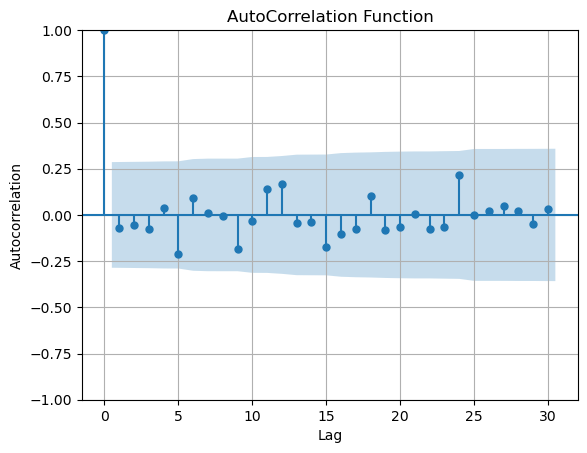

In [16]:
plot_acf(production_diff, lags=30)
plt.title('AutoCorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

In [17]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(production_diff)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -7.0196256258025125
p-value: 6.594646841539081e-10

p-value < alpha; Ha: Stationary


**2.3 - Table B.5 contains the US beverage product shipments data. Find the
sample autocorrelation function for these data. Is
the time series stationary or nonstationary?**

In [18]:
beverage = pd.read_csv('data/US_Beverage_Shipments_Full.csv')

beverage

,Month,Production ($Millions)
0,1992-01-01,3519
1,1992-02-01,3803
2,1992-03-01,4332
3,1992-04-01,4251
4,1992-05-01,4661
...,...,...
175,2006-08-01,7039
176,2006-09-01,6440
177,2006-10-01,6446
178,2006-11-01,6717


In [19]:
beverage['Date'] = pd.to_datetime(beverage['Month'])   # Ensure it's in datetime format
beverage = beverage.set_index('Date')                  # Set as index
beverage = beverage.sort_index()                       # Sort the index chronologically

beverage.drop(columns='Month', inplace=True)           # Drop 'Month' column if still present
beverage = beverage.rename(columns={'Production ($Millions)': 'Production'})

beverage.head()

,Production
Date,
1992-01-01,3519
1992-02-01,3803
1992-03-01,4332
1992-04-01,4251
1992-05-01,4661


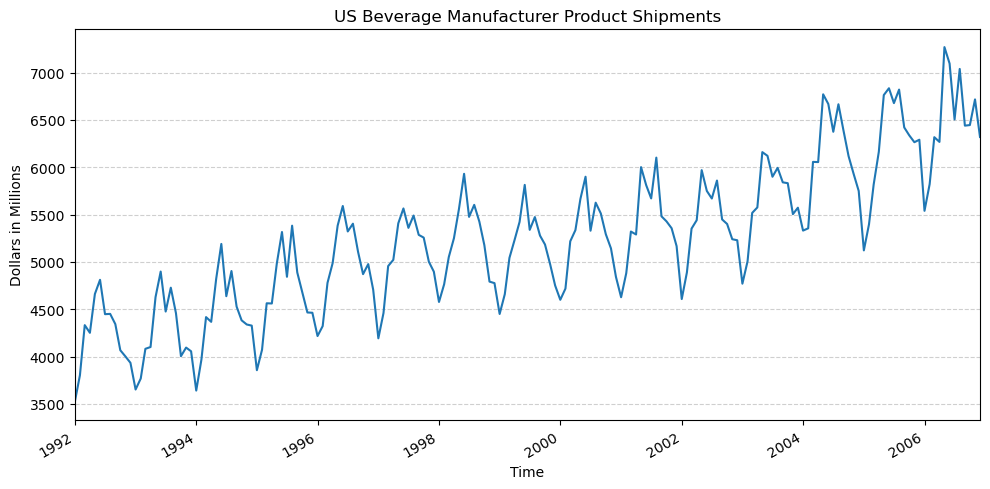

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(beverage)
ax.set_xlabel('Time')
ax.set_ylabel('Dollars in Millions')
ax.set_title('US Beverage Manufacturer Product Shipments')
ax.set_xlim(pd.to_datetime('1992-01-01'), pd.to_datetime('2006-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

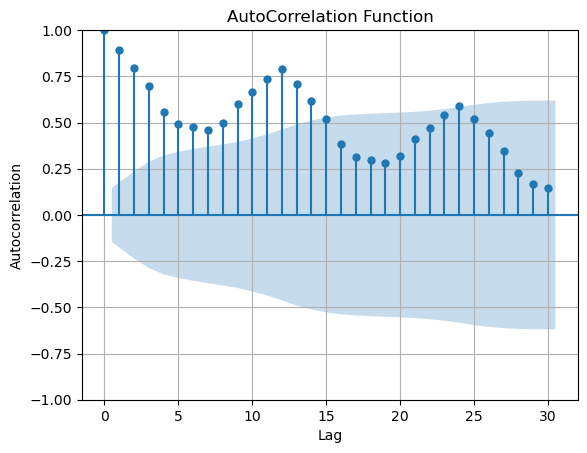

In [21]:
plot_acf(beverage, lags=30)
plt.title('AutoCorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

In [22]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(beverage)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -0.12911084095472605
p-value: 0.9464606738412309

p-value > alpha; H0: Not Stationary


**2.4 Table B.6 contains two time series: the global mean surface air
temperature anomaly and the global CO2 concentration. Find the
sample autocorrelation function and the variogram for both of these
time series. Is either one of the time series stationary?**

In [23]:
temp = pd.read_csv('data/Temperature_and_CO2.csv')

temp

,Year,Anomaly (°C),CO2 (ppmv)
0,1880,-0.11,290.7
1,1881,-0.13,291.2
2,1882,-0.01,291.7
3,1883,-0.04,292.1
4,1884,-0.42,292.6
...,...,...,...
120,2000,0.41,369.5
121,2001,0.56,371.0
122,2002,0.70,373.1
123,2003,0.66,375.6


In [24]:
temp['Date'] = pd.to_datetime(temp['Year'].astype(int), format='%Y')  # Convert year to datetime properly
temp = temp.set_index('Date')                                         # Set datetime as index
temp = temp.sort_index()                                              # Sort by date
temp.drop(columns='Year', inplace=True)                               # Drop original Year column
temp = temp.rename(columns={'Anomaly (°C)': 'Temp',                   # Rename columns
                            'CO2 (ppmv)': 'CO2'})
temp.head()

,Temp,CO2
Date,,
1880-01-01,-0.11,290.7
1881-01-01,-0.13,291.2
1882-01-01,-0.01,291.7
1883-01-01,-0.04,292.1
1884-01-01,-0.42,292.6


In [25]:
temp.tail()

,Temp,CO2
Date,,
2000-01-01,0.41,369.5
2001-01-01,0.56,371.0
2002-01-01,0.70,373.1
2003-01-01,0.66,375.6
2004-01-01,0.60,377.4


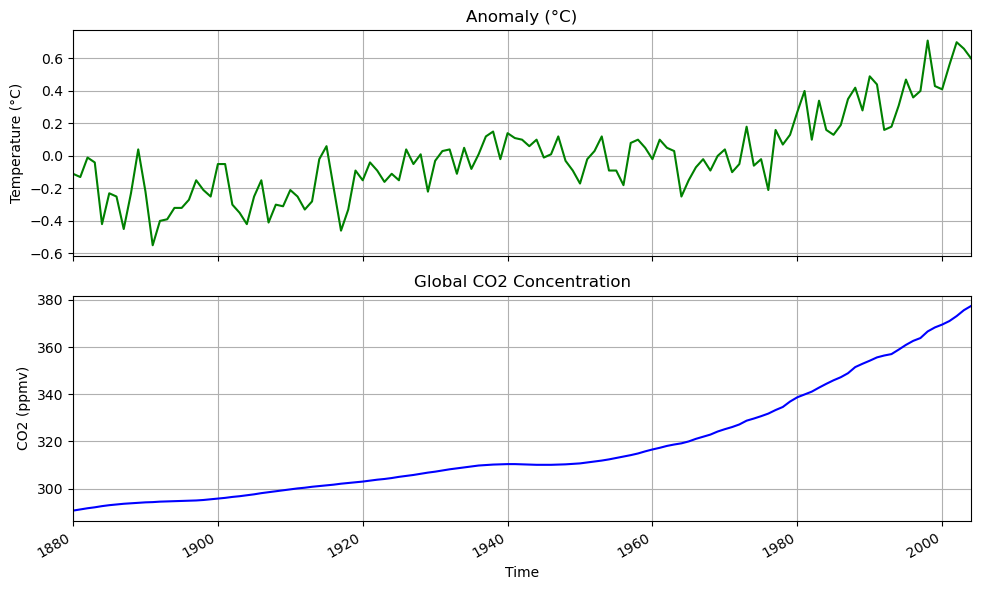

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

ax1.plot(temp['Temp'], color='green')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Anomaly (°C)')
ax1.set_xlim(pd.to_datetime('1880-01-01'), pd.to_datetime('2004-01-01'))
ax1.grid(True) 

ax2.plot(temp['CO2'], color='blue')
ax2.set_xlabel('Time')
ax2.set_ylabel('CO2 (ppmv)')
ax2.set_title('Global CO2 Concentration')
ax2.set_xlim(pd.to_datetime('1880-01-01'), pd.to_datetime('2004-01-01'))
ax2.grid(True) 

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

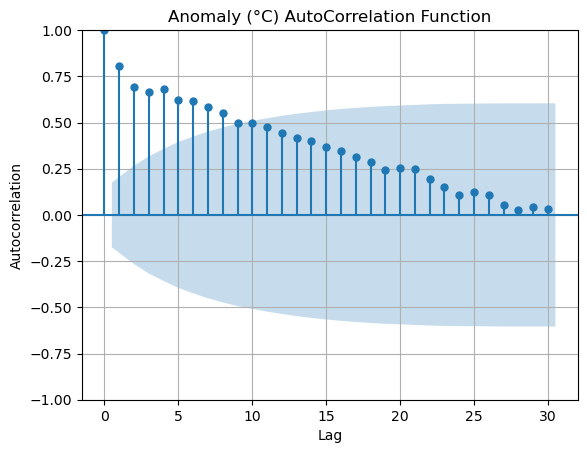

In [27]:
plot_acf(temp['Temp'], lags=30)
plt.title('Anomaly (°C) AutoCorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

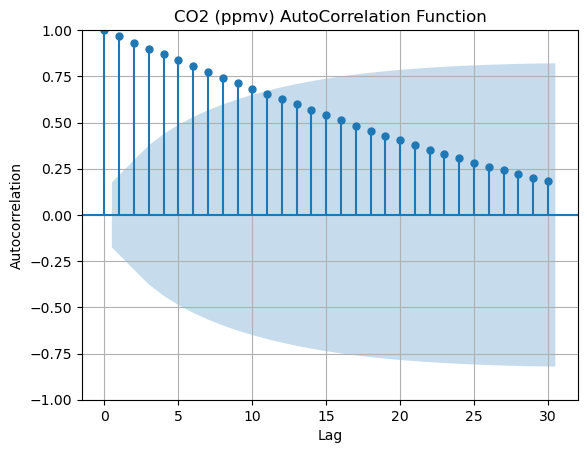

In [28]:
plot_acf(temp['CO2'], lags=30)
plt.title('CO2 (ppmv) AutoCorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

In [29]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(temp['Temp'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: 1.2686695322436505
p-value: 0.9964276216261223

p-value > alpha; H0: Not Stationary


In [30]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(temp['CO2'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: 3.197819911743594
p-value: 1.0

p-value > alpha; H0: Not Stationary


**2.5 Reconsider the global mean surface air temperature anomaly and the
global CO2 concentration time series from Exercise 2.4. Take the
first difference of both time series. Find the sample autocorrelation
function and variogram of these new time series. Is either one of
these differenced time series stationary?**

In [31]:
# First-order differencing

temp_diff = np.diff(temp['Temp'], n=1)

co2_diff = np.diff(temp['CO2'], n=1)

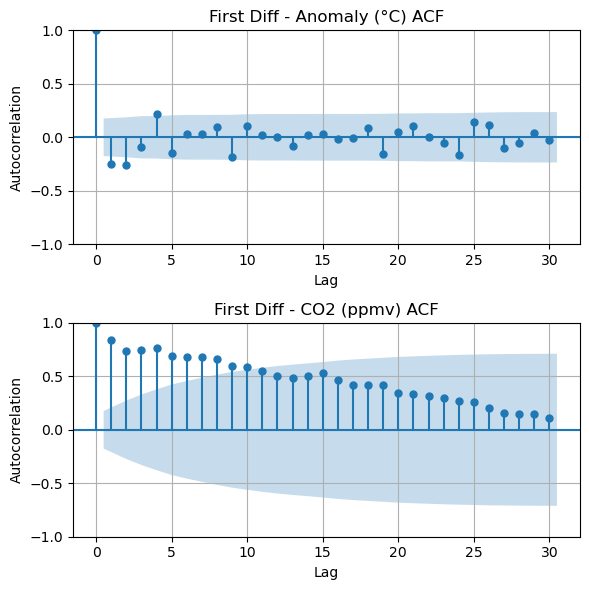

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Plot ACF for Temperature Anomaly
plot_acf(temp_diff, lags=30, ax=ax1)
ax1.set_title('First Diff - Anomaly (°C) ACF')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

# Plot ACF for CO2 Concentration
plot_acf(co2_diff, lags=30, ax=ax2)
ax2.set_title('First Diff - CO2 (ppmv) ACF')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)

plt.tight_layout()
plt.show();

In [33]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(temp_diff)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -8.126861351681049
p-value: 1.1171252450668497e-12

p-value < alpha; Ha: Stationary


In [34]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(co2_diff)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: 0.6710952679914456
p-value: 0.989243017197862

p-value > alpha; H0: Not Stationary
